In [2]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

In [3]:
sample=np.hstack((np.random.normal(loc=0,scale=1,size=1000),np.random.normal(loc=3,scale=1.5,size=1000)))

In [4]:
sample.shape

(2000,)

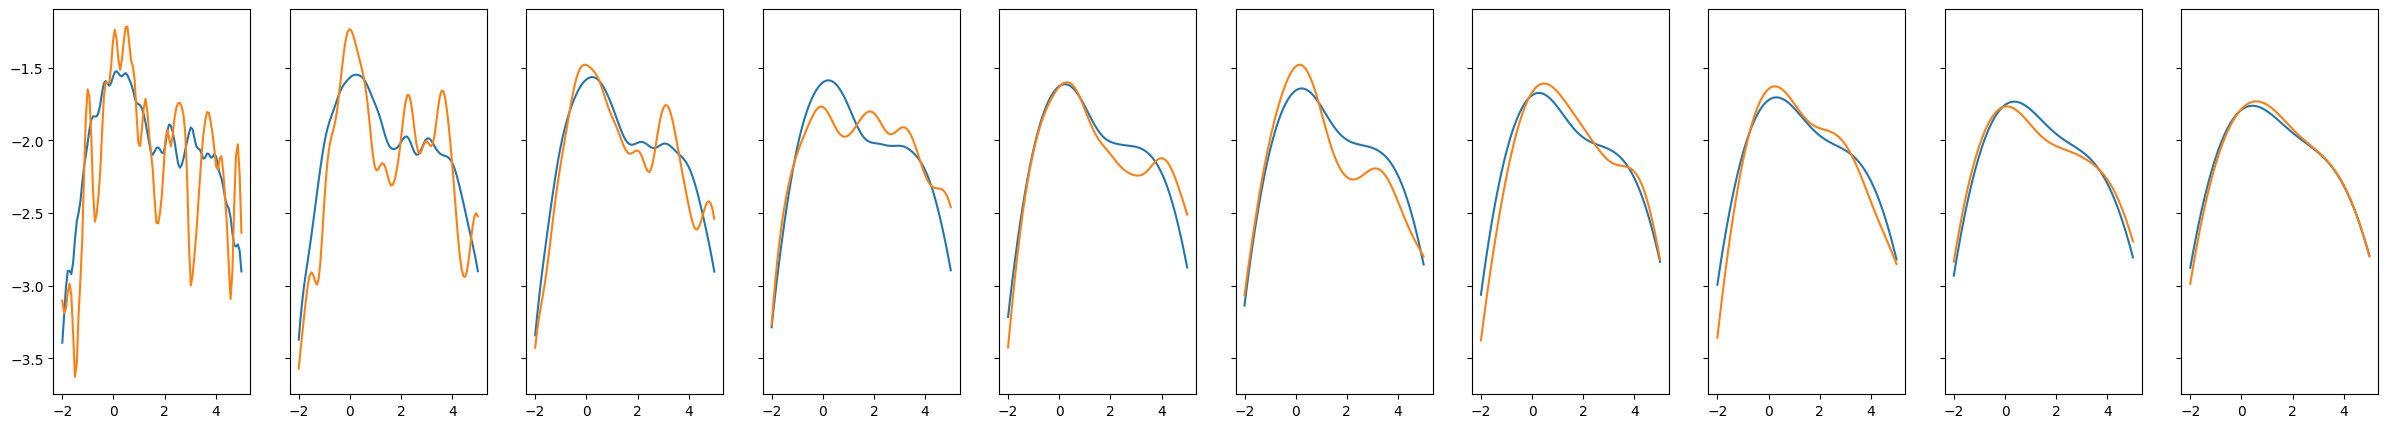

In [5]:
n=10
fig,axs=plt.subplots(1,n,sharex=True,sharey=True,figsize=(30,5))
for i,bw in enumerate(np.linspace(0.1,1,10)):
    kde=KernelDensity(bandwidth=bw)
    kde.fit(sample.reshape(-1,1))
    kde_bootstrap=KernelDensity(bandwidth=bw)
    kde_bootstrap.fit(np.random.choice(sample,size=200).reshape(-1,1))
    x_range=np.linspace(-2,5,100)
    axs[i].plot(x_range,kde.score_samples(x_range.reshape(-1,1)))
    axs[i].plot(x_range,kde_bootstrap.score_samples(x_range.reshape(-1,1)))

In [6]:
print([arr.shape for arr in kde.tree_.get_arrays()])

[(2000, 1), (2000,), (63,), (2, 63, 1)]


In [8]:
len(kde.tree_.get_arrays()[0])

2000